In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../SourceCode')
import bastien_utils
from shallowAE import ShallowAE
from sparseShallowAE import SparseShallowAE_KL, SparseShallowAE_L1, SparseShallowAE_KL_sum
import datetime

Using TensorFlow backend.


In [2]:
FILE_PATH = "../"
data = bastien_utils.load_data(FILE_PATH, train=True, test=True, subsetTest=True)
x_train, y_train, x_test, y_test, x_small, y_small = data
print('x_small shape:', x_small.shape)
print('x_test shape:', x_test.shape)

x_small shape: (10, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [3]:
AE = ShallowAE.load('18_07_09_dim100.h5')

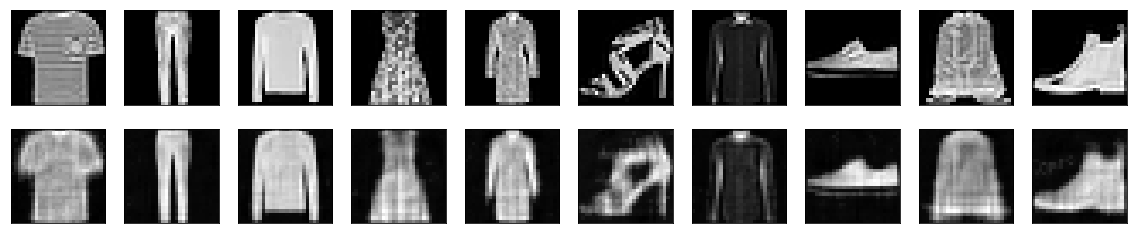

In [4]:
AE.plot_reconstructions(x_small)

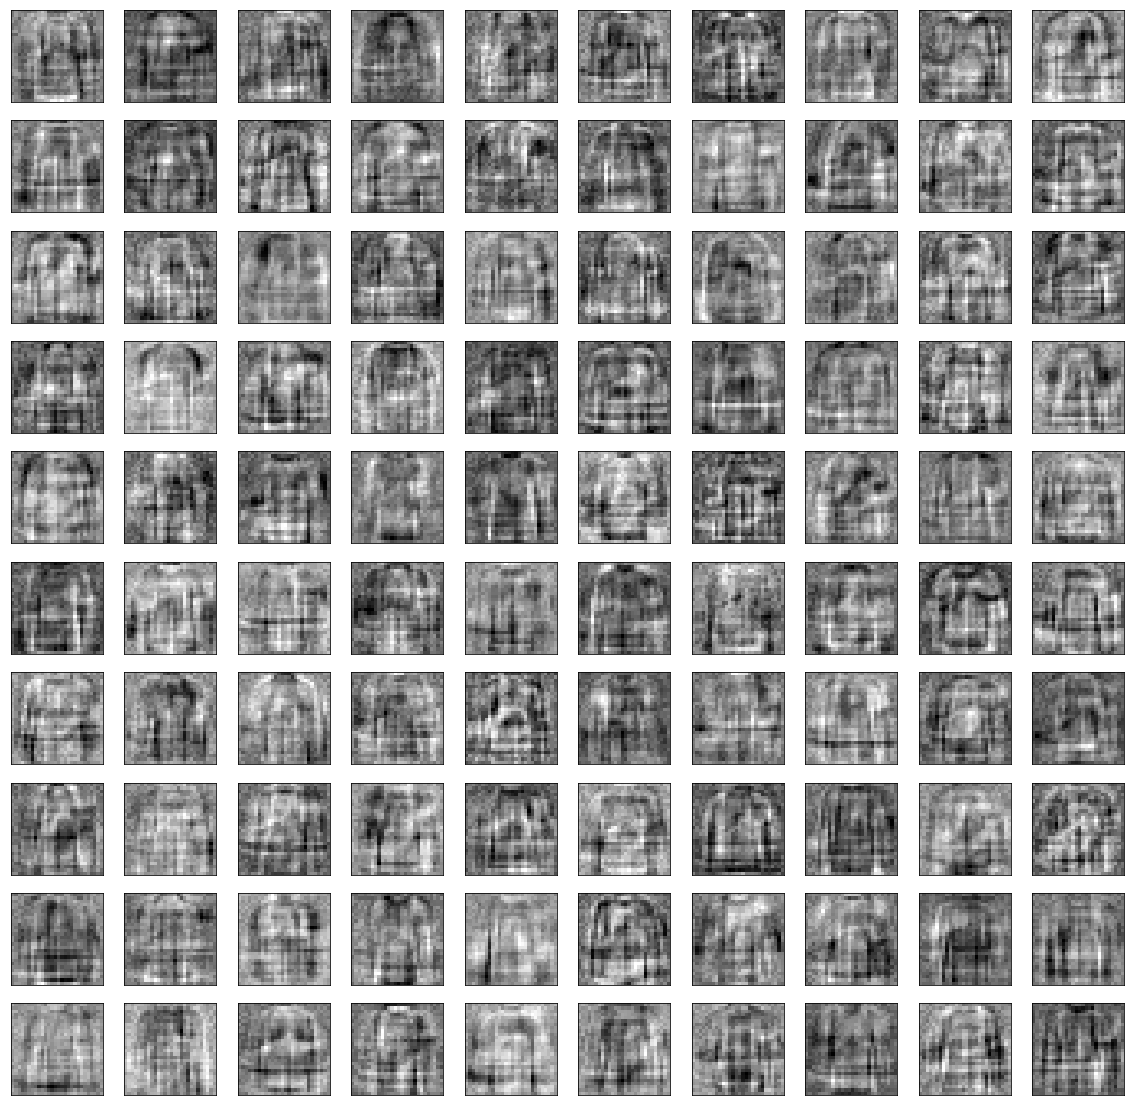

In [5]:
AE.plot_atoms_decoder(add_bias=False)

In [40]:
def add(x, x_square=5, y_square=5):
    x[x_square - 5: x_square+5, y_square-5:y_square+5]=0
    return x 

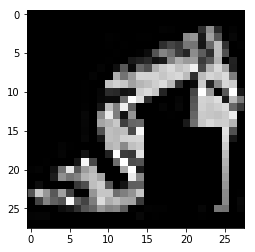

In [41]:
plt.imshow(add(x_small[5,:,:,0], 20, 20))

In [46]:
AE_add = AE.apply_operator_to_decoder_atoms(add, x_square=10, y_square=20)

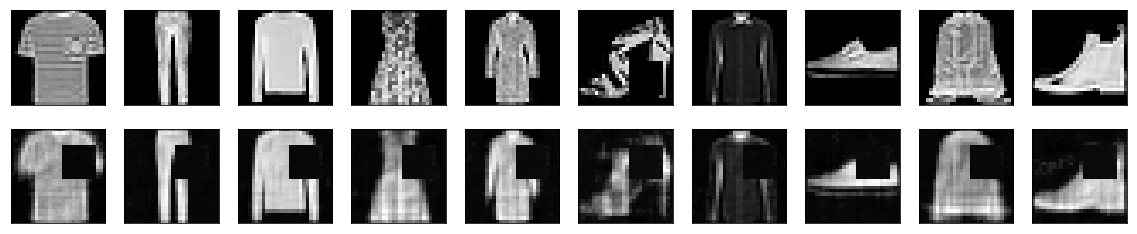

In [47]:
AE_add.plot_reconstructions(x_small)

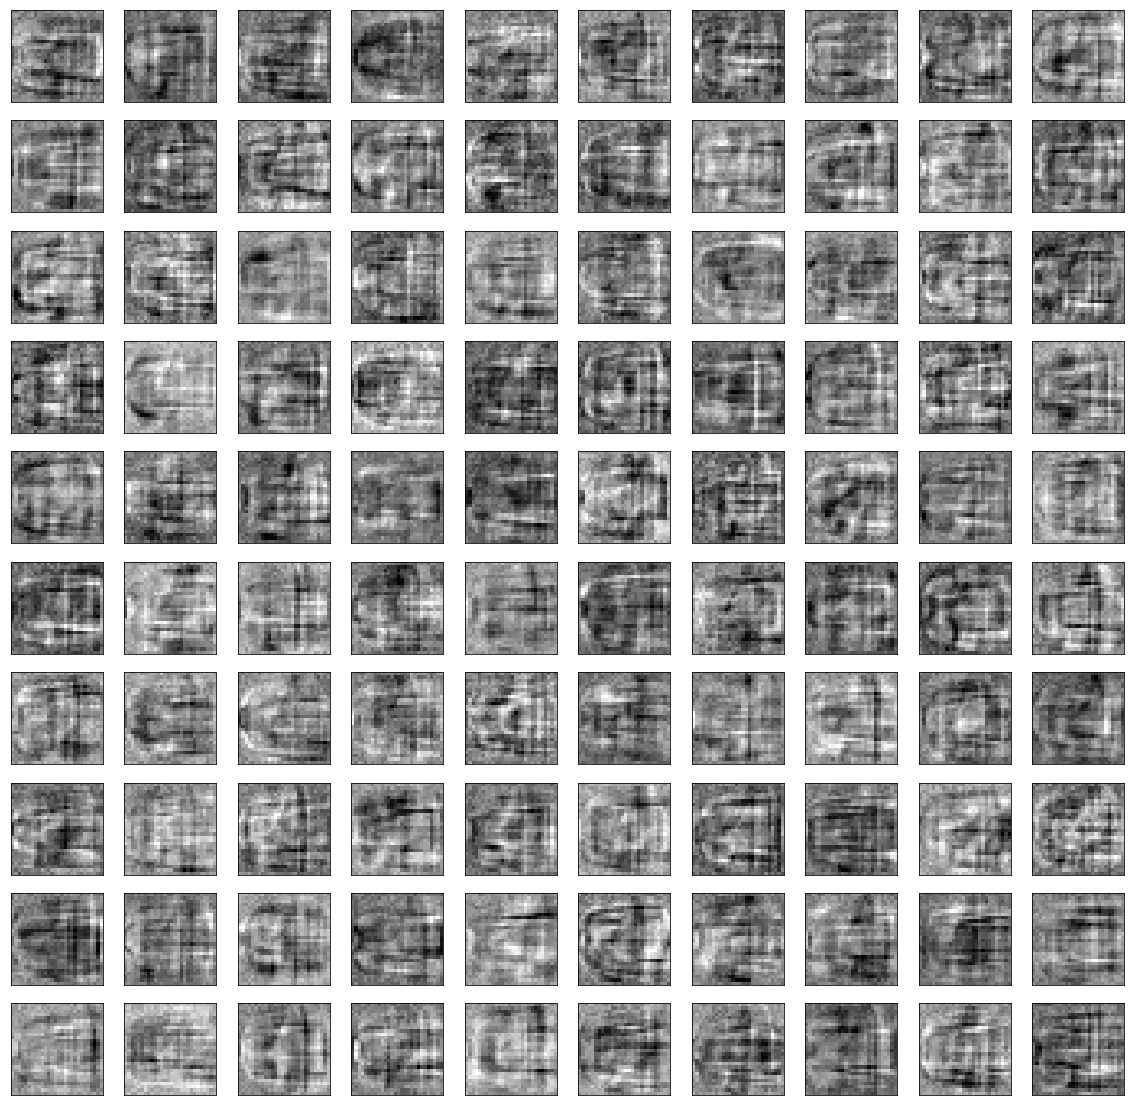

In [44]:
AE_transpose.plot_atoms_decoder()

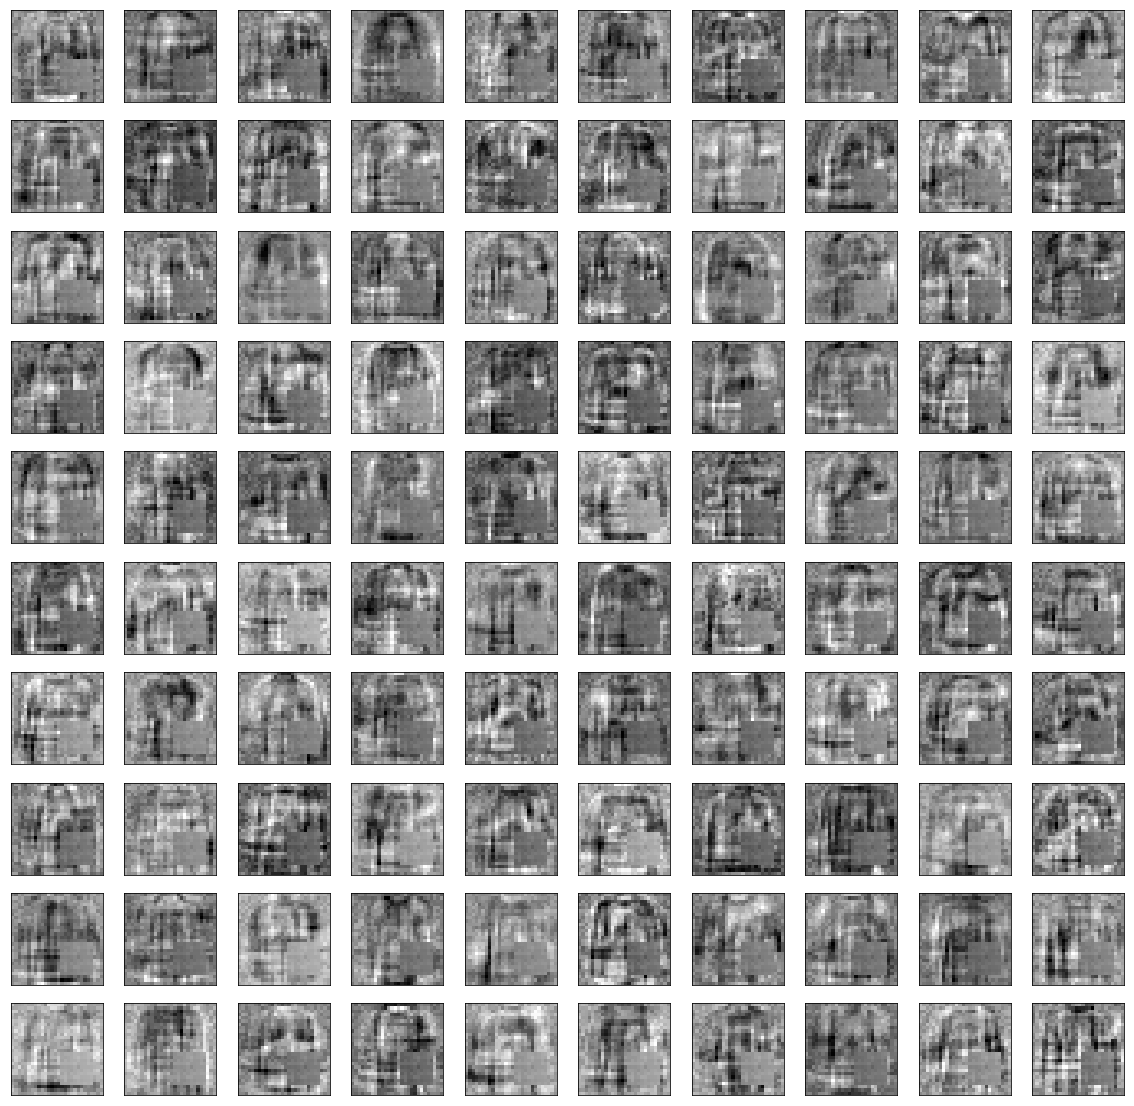

In [45]:
AE_add.plot_atoms_decoder()

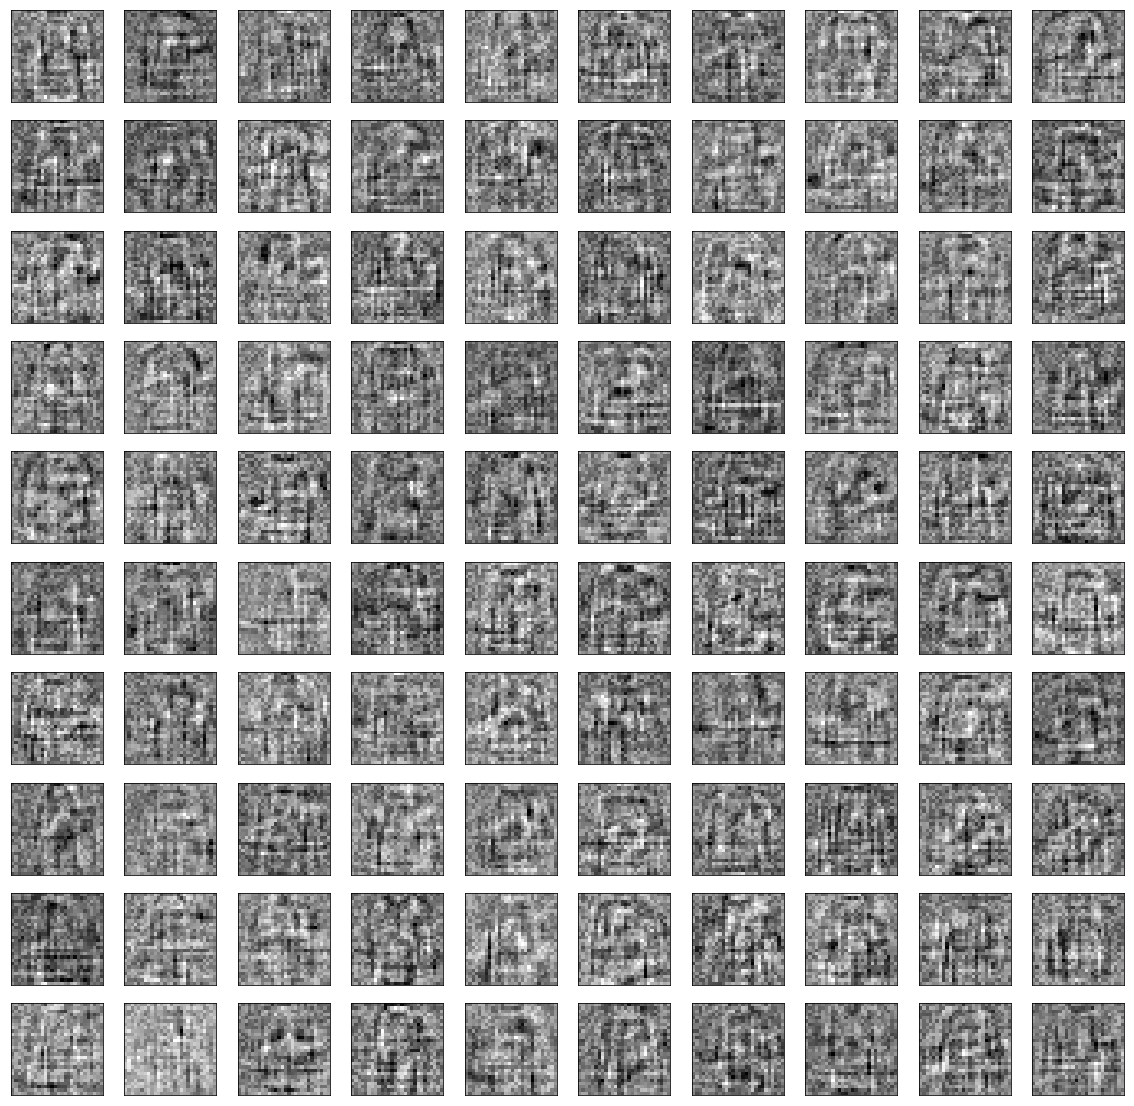

In [14]:
AE_transpose.plot_atoms_encoder()

In [51]:
AE.encoder.input_shape[2]

28

In [56]:
X_val = (x_small,x_small)

In [60]:
len(X_val)

2

In [61]:
len(x_small)

10

In [59]:
if type(X_val) is tuple:
    print("saf")

saf


In [10]:
a = [np.all(AE.atom_images_decoder(add_bias=False, normalize=False)[:,:,0,i] == np.transpose(AE_transpose.atom_images_decoder(add_bias=False, normalize=False)[:,:,0,i])) for i in range(100)]

In [11]:
a

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [31]:
W_1 = AE.atom_images_decoder(add_bias=False)[:,:,0,1]
W_2 = AE_transpose.atom_images_decoder(add_bias=False)[:,:,0,1]

In [35]:
np.all(W_1== np.transpose(W_2))

True

In [24]:
W  = np.array([np.transpose(AE_transpose.atom_images_decoder()[:,:,0,i]) for i in range(100)])

In [25]:
W.shape

(100, 28, 28)